# Bagging-Based Ensemble Lab

### Intro and objectives


### In this lab you will learn:
1. a basic example of bagging-based ensemble

### What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

### In this lab we will learn how build an ensemble classifier based on the voting technique

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

## Let's create some synthetic data

In [4]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Let's create and train a bagging-based classifier consisted of 500 individual classifiers

In [5]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## Let's run some predictions

In [6]:
X_test[0:10]

array([[ 0.50169252,  0.21717211],
       [ 0.22740469,  0.5899372 ],
       [ 0.26816663,  0.43111374],
       [ 1.31270833, -0.59523574],
       [ 0.41835564, -0.3826774 ],
       [ 0.53680639, -0.32084028],
       [-0.19975183,  1.43509879],
       [-0.85385457,  0.71924064],
       [-0.57050579,  0.00411171],
       [-0.67806633,  0.74946744]])

In [7]:
y_test[0:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [8]:
bag_clf.predict([X_test[0]])

array([0])

In [9]:
bag_clf.predict([X_test[9]])

array([0])

In [10]:
bag_clf.predict(X_test[0:10])

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

## Let's evauate the performance

In [11]:
bag_clf.score(X_test, y_test)

0.904

## Let's visualize the boundaries of the bagging ensemble

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [18]:
def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

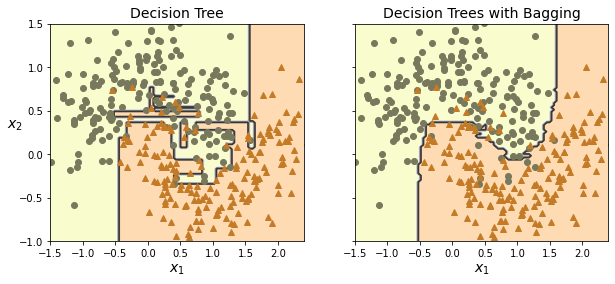

In [19]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")

plt.show()

#### As you can see, the ensemble’s predictions will likely generalize much better than the single decision tree’s predictions: the ensemble has a comparable bias but a smaller variance (it makes roughly the same number of errors on the training set, but the decision boundary is less irregular).